In [2]:
import pandas as pd
import numpy as np
import seaborn as sb 

import  matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.shape

(1599, 12)

# EDA 

In [8]:
import seaborn as sb 

<AxesSubplot:xlabel='quality', ylabel='count'>

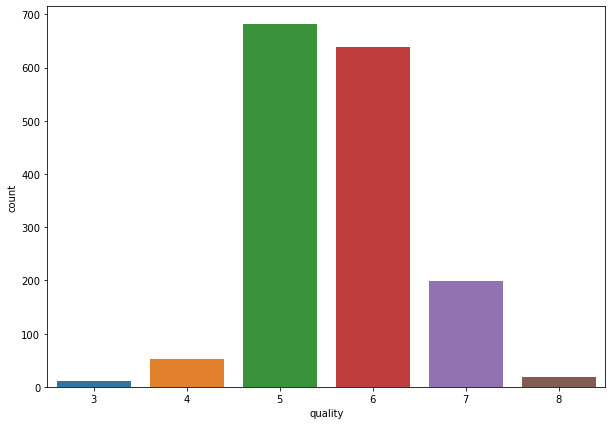

In [9]:
plt.figure(figsize=(10,7))
sb.countplot(x='quality',data=df)

here we see there are 6 type of variable in wine 3,4,5,6,7,8 but we have to work on two target categories good-1 and not good-0. so 7 and higher is good and lower is not good 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

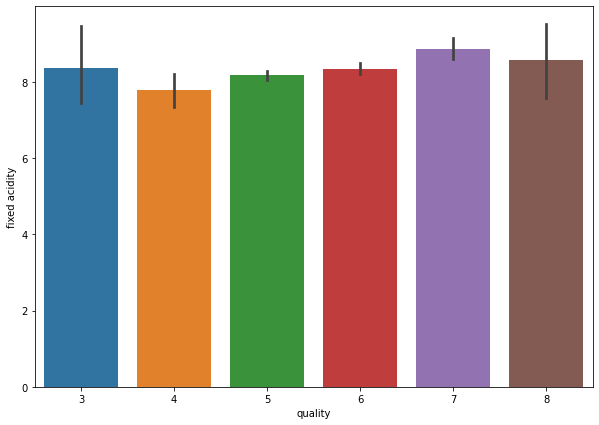

In [10]:
# feature vs lable
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

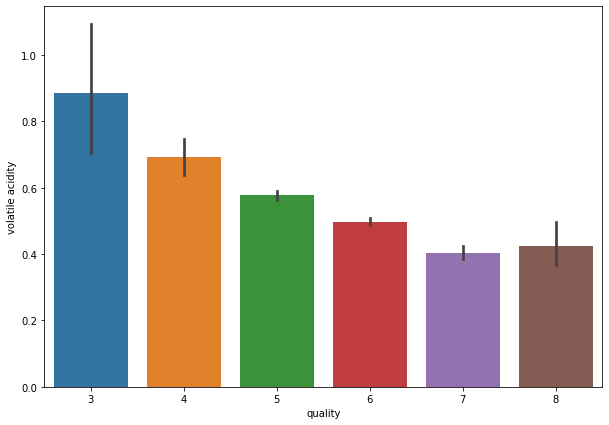

In [11]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='volatile acidity',data=df)

as volatile acidity is decreases the quality is increases


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

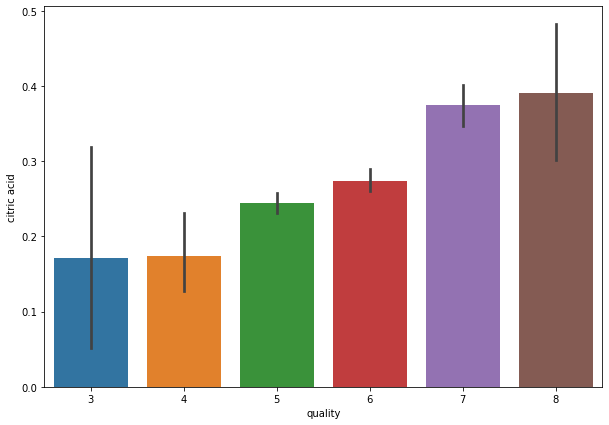

In [12]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='citric acid',data=df)

as citric acid is increases the quality increases

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

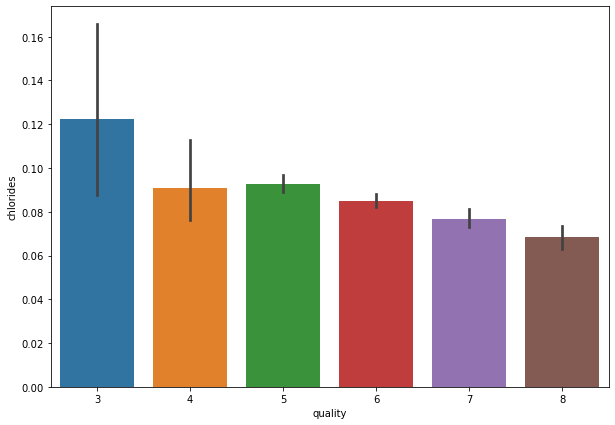

In [13]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='chlorides',data=df)

as we see here the chlorides decreases better the quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

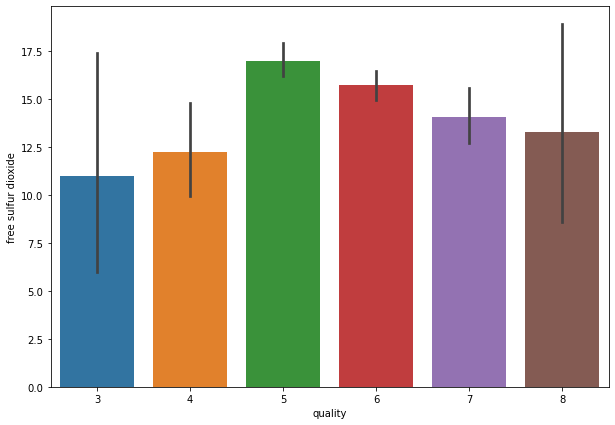

In [14]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='free sulfur dioxide',data=df)

cant say anything 

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

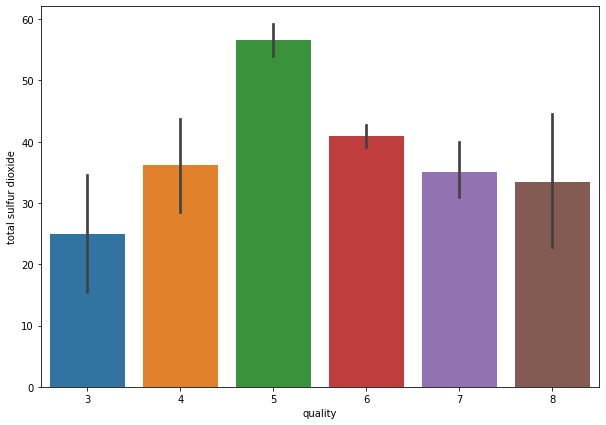

In [15]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

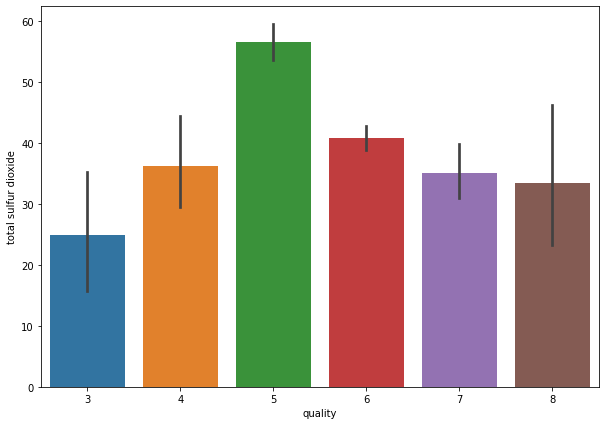

In [16]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='total sulfur dioxide',data=df)

here we cant find any relationship 

<AxesSubplot:xlabel='quality', ylabel='pH'>

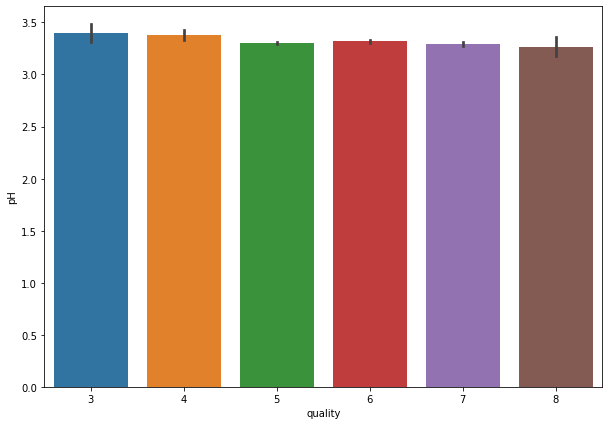

In [17]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='pH',data=df)

cant say anything

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

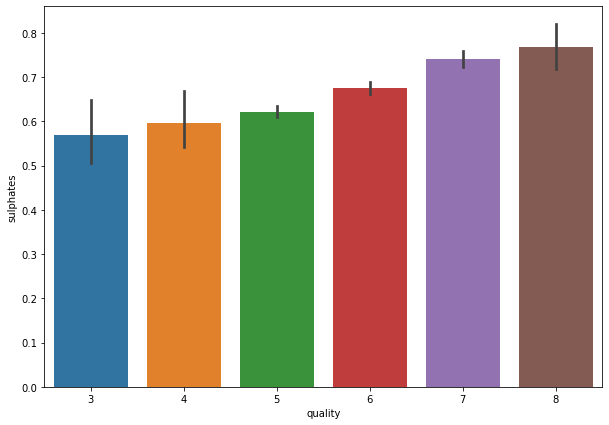

In [18]:
plt.figure(figsize=(10,7))
sb.barplot(x='quality',y='sulphates',data=df)

alcohal shows the good relationship 

# we see the correlation 

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

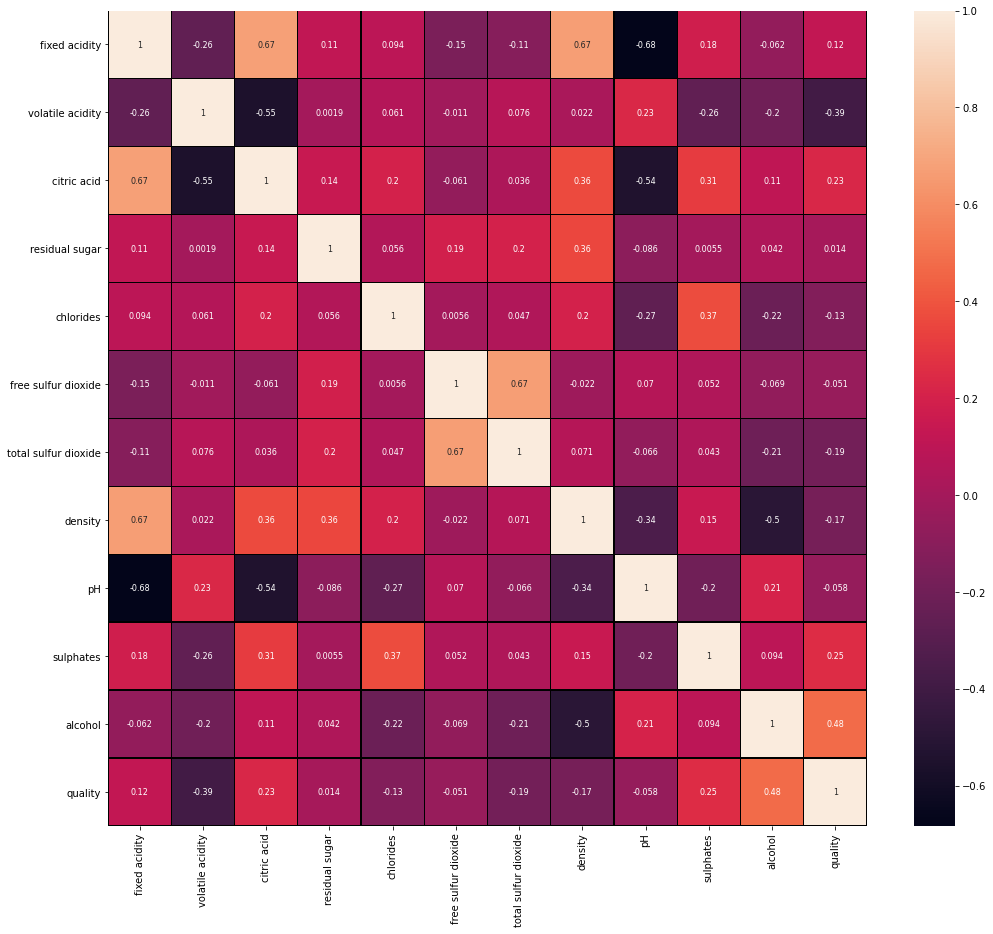

In [20]:
plt.figure(figsize=(17,15))
sb.heatmap(df.corr(),annot=True,annot_kws={'size':8},linecolor='black',linewidths=0.2)

there are some positive and negative correlation, but we see here alcohal has strong correlation from other feature over the quality 

# Finding outliers

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### there might be some outliers here.lets plot graph to find out 

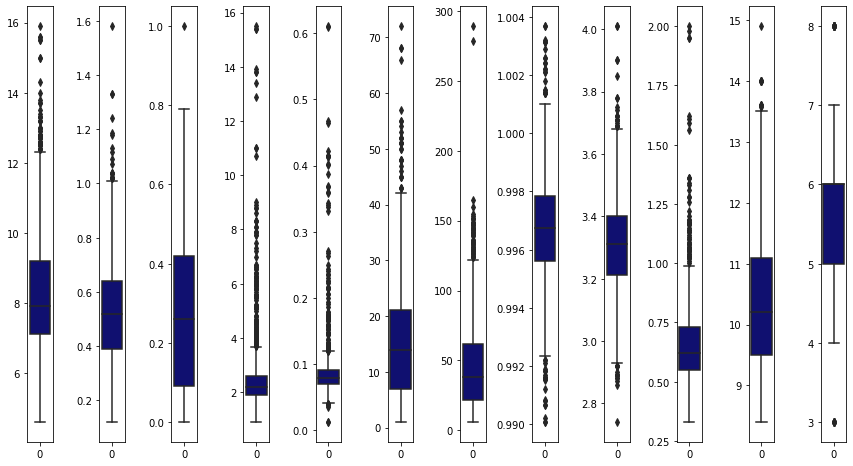

In [22]:
import warnings
warnings.filterwarnings('ignore')

collist= df.columns.values
nrows=14
ncol=30
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(data=df[collist[i]],color='navy',orient='v')
    plt.tight_layout()

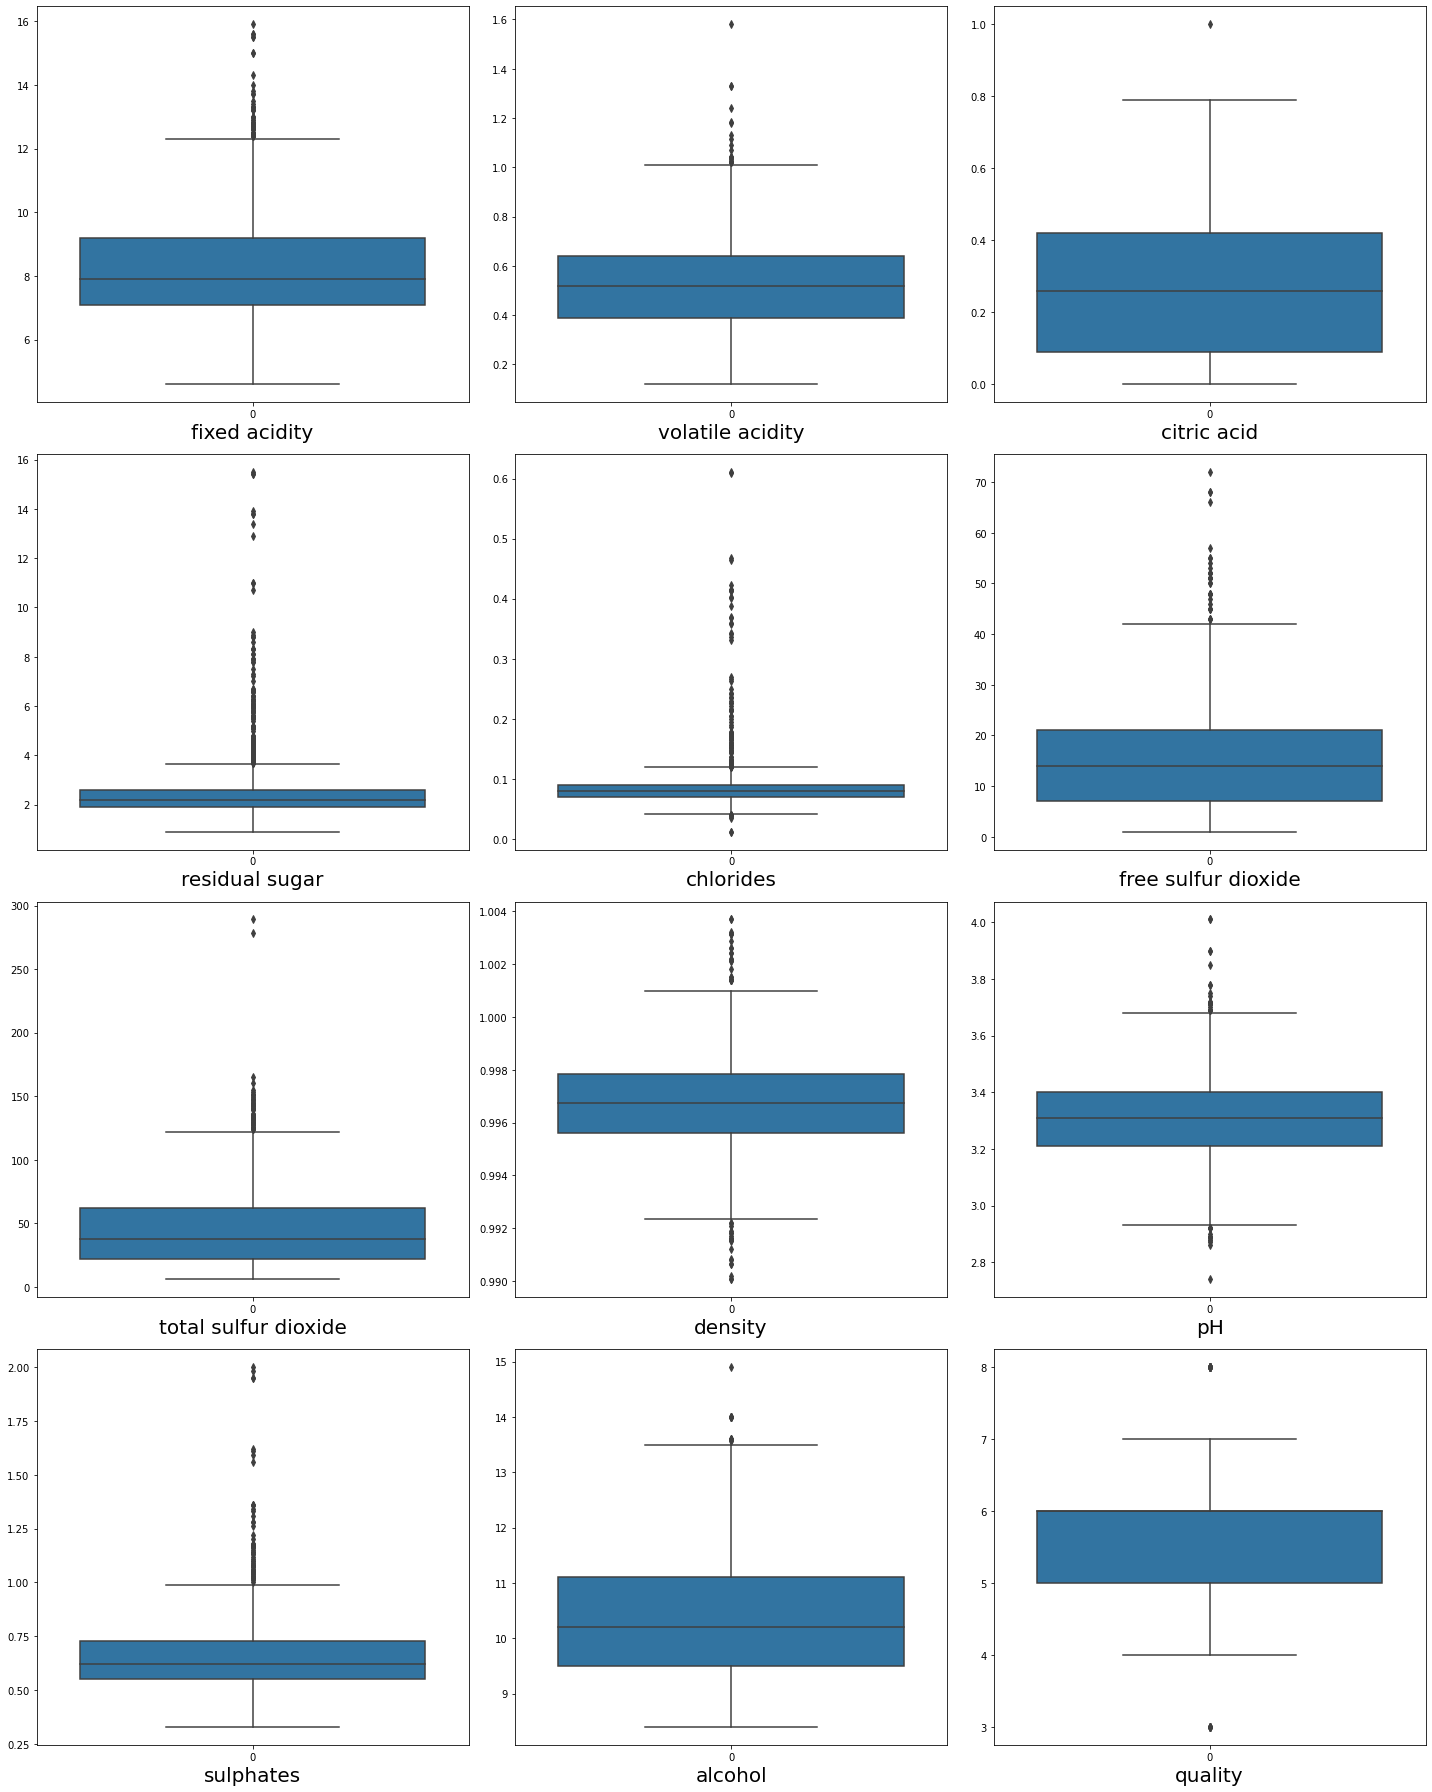

In [23]:
plt.figure(figsize=(20,25))
numb=1

for columns in df:
    if numb<=14:
        ax= plt.subplot(4,3,numb)
        sb.boxplot(data=df[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')

here we see there are lots of outliers in almost every columns.
we do not remove all the outliers due to following reasons:-

1.we have limited data in this dataset

2.we have lots of continue range in outliers

3.it might be little baised if i remove the outliers

# check if data is normally distributed and check the skewness

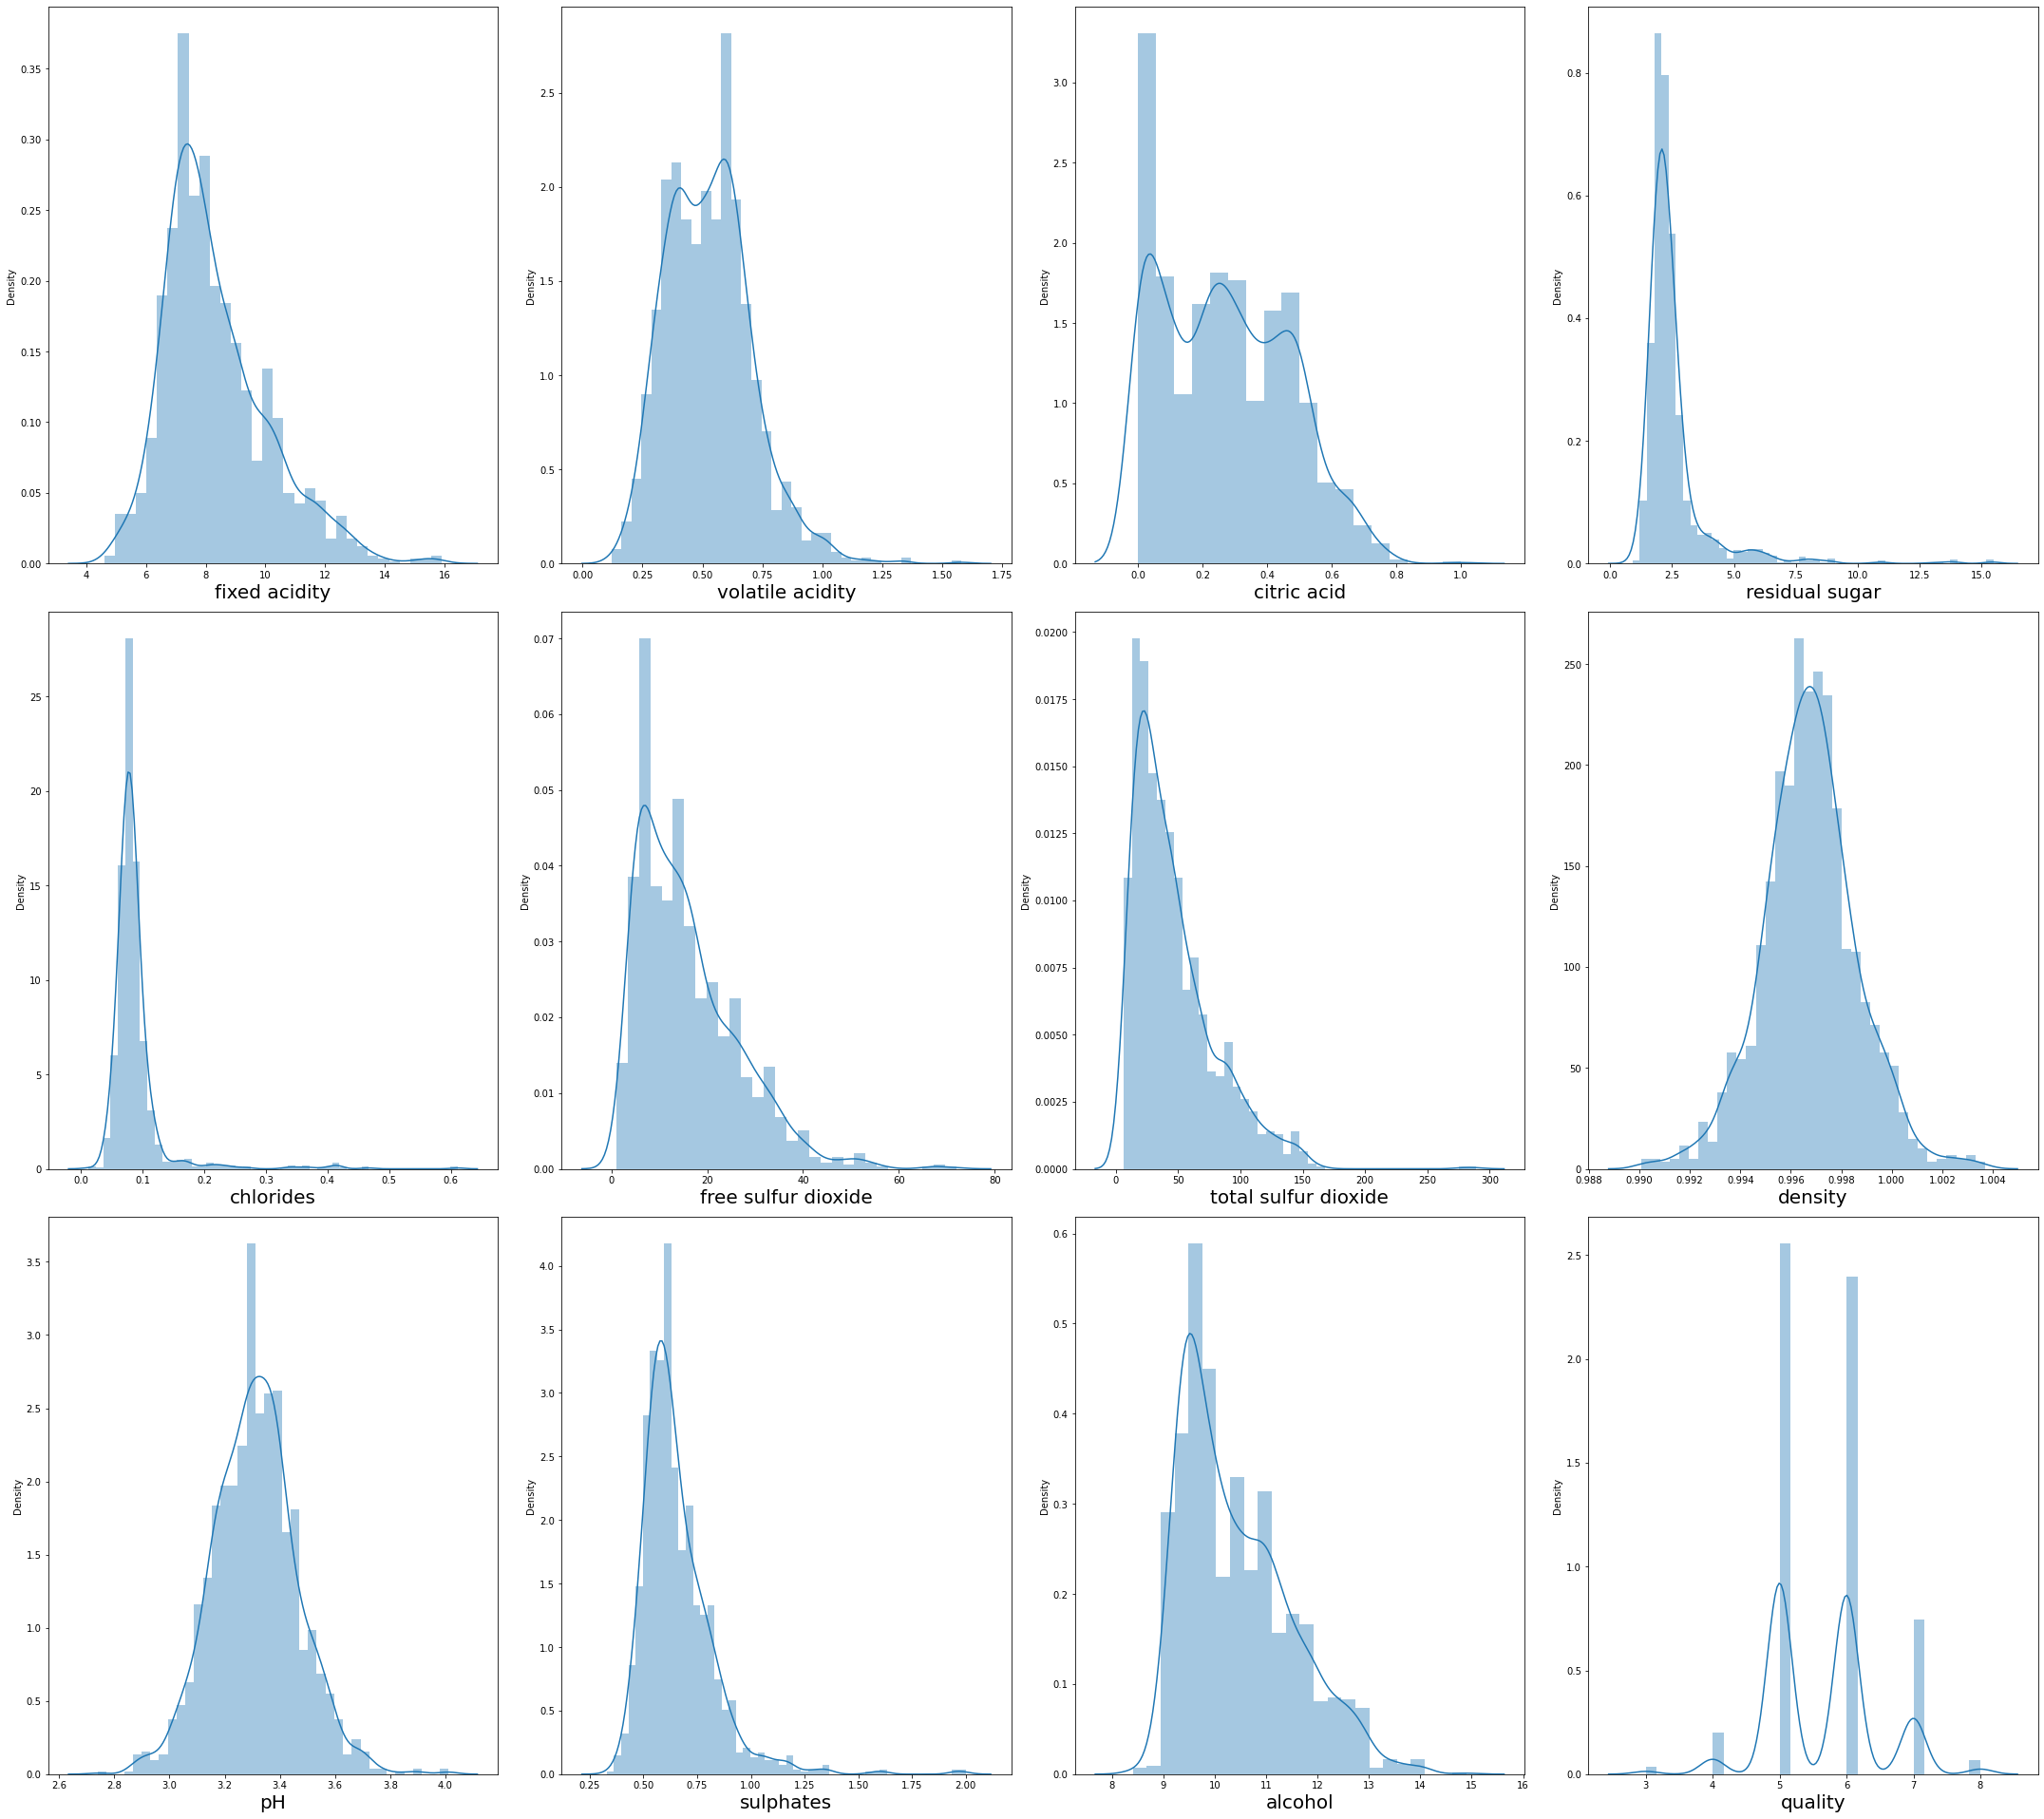

In [24]:
plt.figure(figsize=(30,35))
numb=1

for columns in df:
    if numb<=14:
        ax= plt.subplot(4,4,numb)
        sb.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()

as we see here that all the feature columns are skewed,some of them like residual sugar, chlorides,totl sulfur dioxide,sulphates are more and positively skewed

while the other columns are little skewed

and almost all the columns are positively skewed

so here what we do, we just use the log transformation for only necessary columns

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

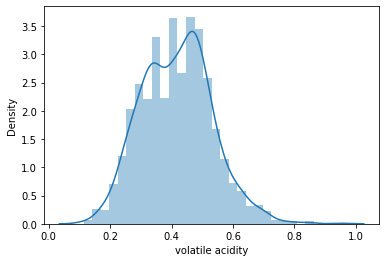

In [25]:
df['volatile acidity']=np.log(1+ df['volatile acidity'])
sb.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

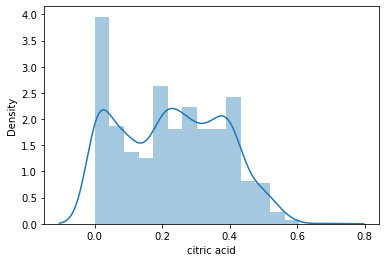

In [26]:
df['citric acid']=np.log(1 + df['citric acid'])
sb.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

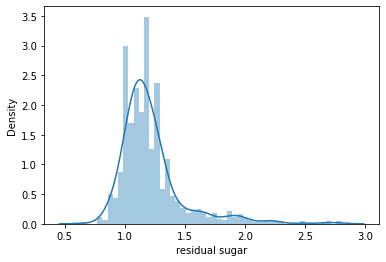

In [27]:
df['residual sugar']=np.log(1+df['residual sugar'] )
sb.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

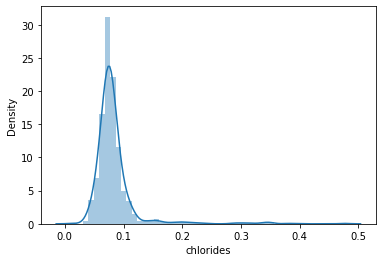

In [28]:
df['chlorides']=np.log(1+df['chlorides'])
sb.distplot(df['chlorides'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

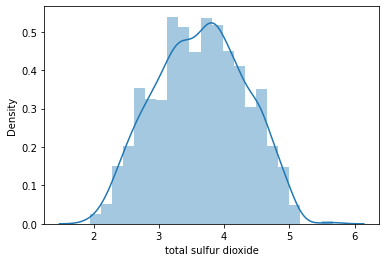

In [29]:
df['total sulfur dioxide']=np.log(1+df['total sulfur dioxide'])
sb.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

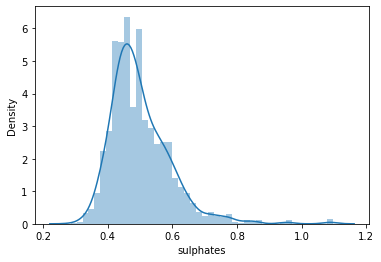

In [30]:
df['sulphates']=np.log(1+df['sulphates'])
sb.distplot(df['sulphates'])

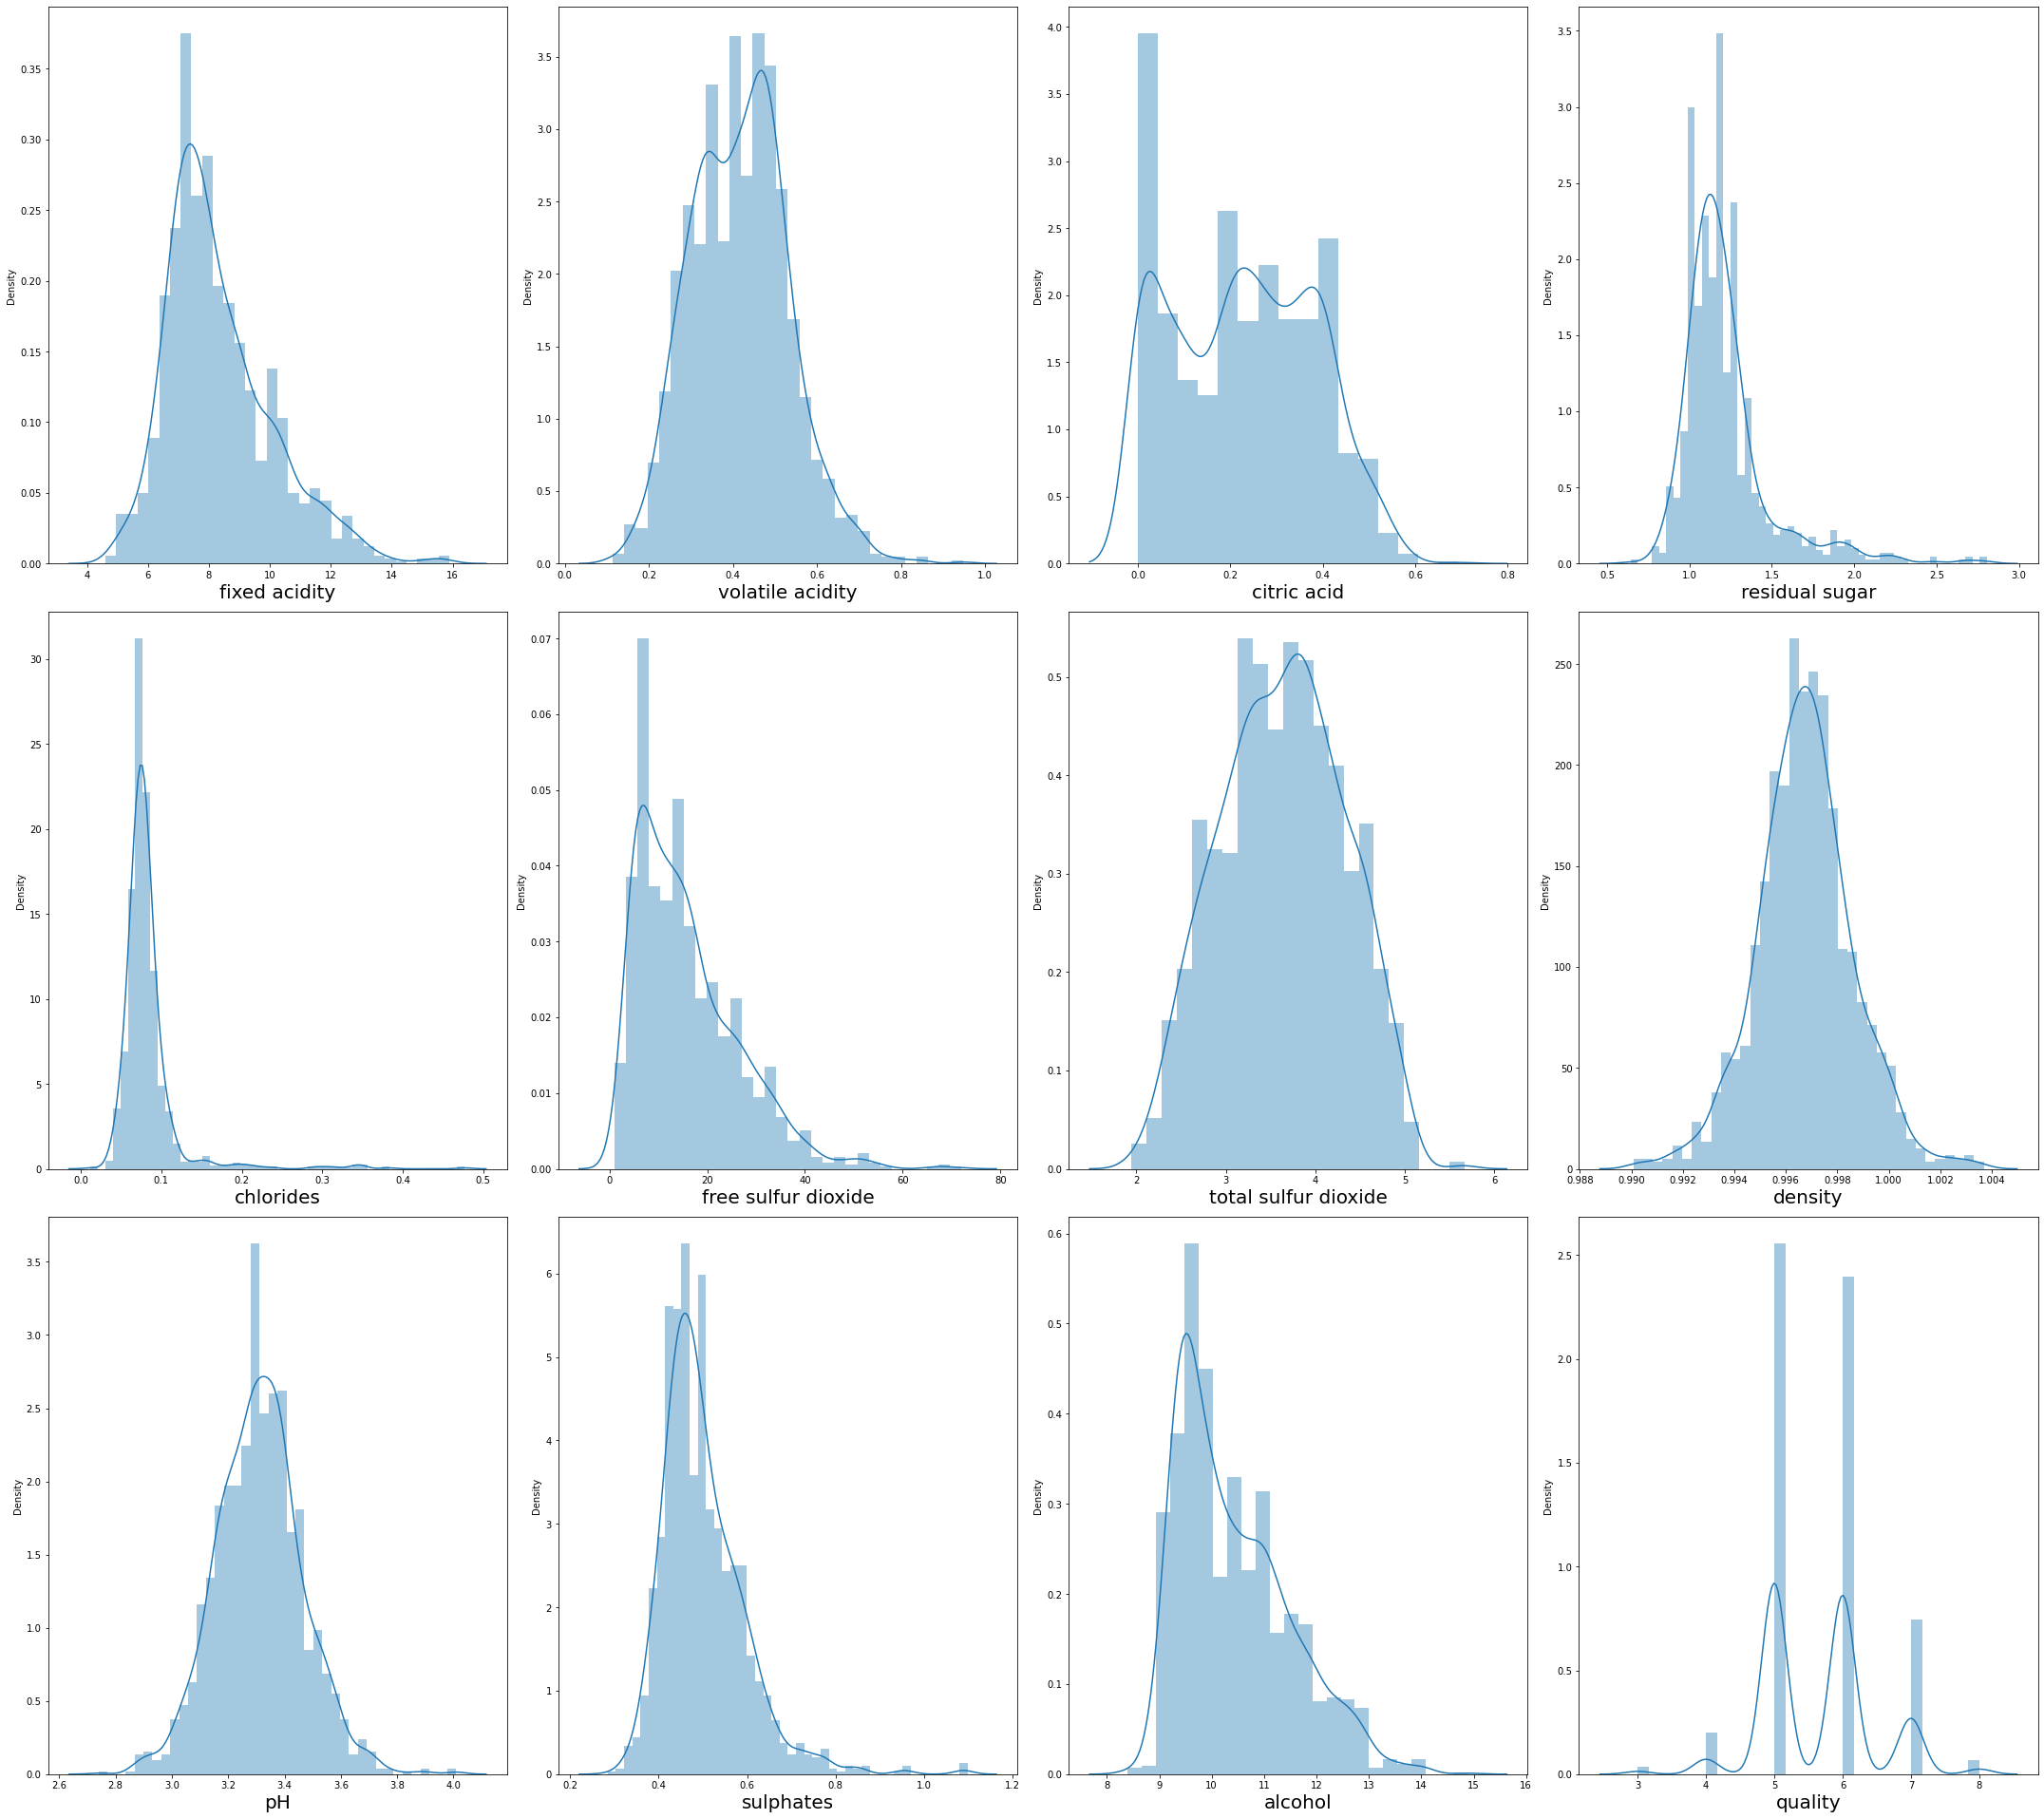

In [31]:
plt.figure(figsize=(30,35))
numb=1

for columns in df:
    if numb<=14:
        ax= plt.subplot(4,4,numb)
        sb.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()

now we see almost all the data is normally distributed here. 


now we can use it for further process 

In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.530628,0.000000,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5
1,7.8,0.631272,0.000000,1.280934,0.093490,25.0,4.219508,0.9968,3.20,0.518794,9.8,5
2,7.8,0.565314,0.039221,1.193922,0.088011,15.0,4.007333,0.9970,3.26,0.500775,9.8,5
3,11.2,0.246860,0.444686,1.064711,0.072321,17.0,4.110874,0.9980,3.16,0.457425,9.8,6
4,7.4,0.530628,0.000000,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5


In [33]:
#create Classification version of target variable
df['wine_quality']=[1 if X>=7 else 0 for X in df['quality']]


In [34]:
df['wine_quality'].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

here we see the target is imbalance. so, we have to balance it

In [35]:
## first we distribute features and target
x=df.drop(columns=['quality','wine_quality'],axis=1)
y=df['wine_quality']

balancing the data 

In [36]:
df['wine_quality'].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

In [37]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [38]:
y.value_counts()

0    1382
1    1382
Name: wine_quality, dtype: int64

<AxesSubplot:>

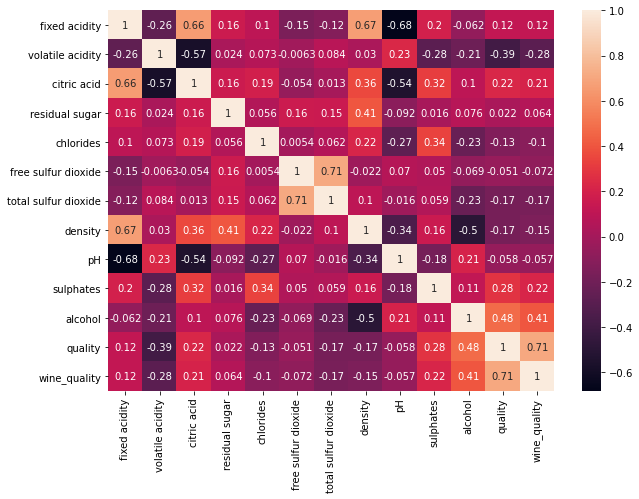

In [39]:
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(),annot=True)

here we see free sulfur dioxide and total sulfur dioxide showing kind of multicollinearity problem so i drop the one of them 

In [40]:
new_x=x.drop('free sulfur dioxide',axis=1)
new_x.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
724,7.500000,0.749055,0.095310,1.410987,0.082501,2.564949,0.995800,3.540000,0.470004,11.200000
1532,7.200000,0.425268,0.122218,1.098612,0.056380,3.135494,0.995730,3.210000,0.518794,9.900000
2548,7.623818,0.303804,0.412784,1.989651,0.051204,5.312779,0.993283,3.082232,0.444657,12.151287
2727,6.883650,0.462639,0.118477,1.180785,0.074587,3.377157,0.995835,3.490913,0.482426,10.636312
397,11.500000,0.463734,0.463734,1.280934,0.083422,3.912023,0.998800,3.180000,0.500775,11.000000


so here i am not dropping anymore columns due to limited dataset, but i will scale the data due to variation between the feature columns 

In [41]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
x_scaled

array([[-0.62784833,  1.33145001, -1.73216385, ...,  1.42247829,
        -0.89391163, -1.31111452],
       [-0.40634576,  2.23956023, -1.73216385, ..., -0.67465225,
        -0.04195481, -0.95394952],
       [-0.40634576,  1.64441907, -1.47418561, ..., -0.26875602,
        -0.24909836, -0.95394952],
       ...,
       [-0.25670086, -1.09337303,  0.63077517, ..., -0.58527142,
         0.56176091,  1.55098609],
       [ 0.18778594,  0.04366851,  1.02749908, ..., -0.583442  ,
        -0.62974032,  1.1239368 ],
       [ 0.35769518, -0.65416175,  0.96944654, ..., -0.62498451,
         0.73335258,  1.33824335]])

In [42]:
# spliting the data

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=101,test_size=0.25)

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [110]:
print(accuracy_score(y_test,y_pred1),'\n','\n')
print(confusion_matrix(y_test,y_pred1),'\n')
print(classification_report(y_test,y_pred1))

0.8147612156295224 
 

[[272  73]
 [ 55 291]] 

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       345
           1       0.80      0.84      0.82       346

    accuracy                           0.81       691
   macro avg       0.82      0.81      0.81       691
weighted avg       0.82      0.81      0.81       691



# Decision tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [211]:
print('1.accuracy score:-',accuracy_score(y_test,y_pred2))
print('2.classification report:-\n',classification_report(y_test,y_pred2))
print('3.confusion matrix:-\n',confusion_matrix(y_test,y_pred2))

1.accuracy score:- 0.9044862518089725
2.classification report:-
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       345
           1       0.89      0.92      0.91       346

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691

3.confusion matrix:-
 [[307  38]
 [ 28 318]]


# Random forest 

In [204]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [205]:
y_pred3=rd.predict(x_test)

In [206]:
print('1.Accuracy score:-',accuracy_score(y_test,y_pred3))
print('2.classification report:-\n',classification_report(y_test,y_pred3))
print('3.Confusion matrix:-\n',confusion_matrix(y_test,y_pred3))

1.Accuracy score:- 0.9507959479015919
2.classification report:-
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       345
           1       0.93      0.97      0.95       346

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.95      0.95      0.95       691

3.Confusion matrix:-
 [[320  25]
 [  9 337]]


# Support vector machine

using feature selection techineque , i will use pca

In [207]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [208]:
svc.fit(x_train,y_train)

SVC()

In [209]:
y_pred4=svc.predict(x_test)


In [210]:
print('1.Accuracy score:-',accuracy_score(y_test,y_pred4))
print('2.classification report:-\n',classification_report(y_test,y_pred4))
print('3.Confusion matrix:-\n',confusion_matrix(y_test,y_pred4))

1.Accuracy score:- 0.8986975397973951
2.classification report:-
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       345
           1       0.87      0.93      0.90       346

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691

3.Confusion matrix:-
 [[298  47]
 [ 23 323]]


# K- NEREAST NEIGHBORS

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred5=knn.predict(x_test)

In [196]:
print('1.Accuracy score:-',accuracy_score(y_test,y_pred_ada))
print('2.classification report:-\n',classification_report(y_test,y_pred_ada))
print('3.Confusion matrix:-\n',confusion_matrix(y_test,y_pred_ada))

1.Accuracy score:- 0.8639652677279306
2.classification report:-
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       345
           1       0.86      0.87      0.86       346

    accuracy                           0.86       691
   macro avg       0.86      0.86      0.86       691
weighted avg       0.86      0.86      0.86       691

3.Confusion matrix:-
 [[296  49]
 [ 45 301]]


# ADA BOOST

In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier()

In [170]:
ada_boost.fit(x_train,y_train)
y_pred_ada=ada_boost.predict(x_test)

In [190]:
print('1.Accuracy score:-',accuracy_score(y_test,y_pred_ada),'\n')
print('2.Classification report:- \n',classification_report(y_test,y_pred_ada))
print('3.Confusion matrix:-\n',confusion_matrix(y_test,y_pred_ada))

1.Accuracy score:- 0.8639652677279306 

2.Classification report:- 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       345
           1       0.86      0.87      0.86       346

    accuracy                           0.86       691
   macro avg       0.86      0.86      0.86       691
weighted avg       0.86      0.86      0.86       691

3.Confusion matrix:-
 [[296  49]
 [ 45 301]]


# GradientBoostingClassifier

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
gdt=GradientBoostingClassifier()
gdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [158]:
y_pred6=gdt.predict(x_test)

In [191]:
print('1.accuracy score:-',accuracy_score(y_test,y_pred6),'\n')
print('2.classification report:-\n',classification_report(y_test,y_pred6))
print('3.confusion matrix:-\n',confusion_matrix(y_test,y_pred6))

1.accuracy score:- 0.9015918958031838 

2.classification report:-
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       345
           1       0.88      0.94      0.91       346

    accuracy                           0.90       691
   macro avg       0.90      0.90      0.90       691
weighted avg       0.90      0.90      0.90       691

3.confusion matrix:-
 [[299  46]
 [ 22 324]]


# XGBOOST

In [101]:
import xgboost as xgb

In [151]:
model1=xgb.XGBClassifier()
model1.fit(x_train,y_train)
y_pred7=model1.predict(x_test)

In [155]:
print('1.accuracy score:-',accuracy_score(y_test,y_pred7))
print('2.classification report:-\n',classification_report(y_test,y_pred7))
print('3.confusion matrix:-\n',confusion_matrix(y_test,y_pred7))

1.accuracy score:- 0.9536903039073806
2.classification report:-
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       345
           1       0.94      0.97      0.95       346

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.95      0.95      0.95       691

3.confusion matrix:-
 [[322  23]
 [  9 337]]


In [135]:
from  sklearn.metrics import roc_curve,plot_roc_curve

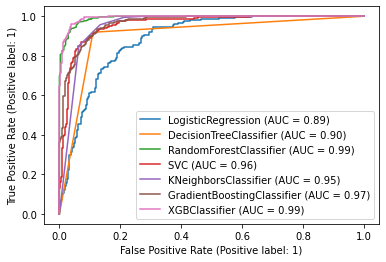

In [147]:

distp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=distp.ax_);
plot_roc_curve(rd,x_test,y_test,ax=distp.ax_);
plot_roc_curve(svc,x_test,y_test,ax=distp.ax_);
plot_roc_curve(knn,x_test,y_test,ax=distp.ax_);
plot_roc_curve(gdt,x_test,y_test,ax=distp.ax_);
plot_roc_curve(model1,x_test,y_test,ax=distp.ax_);
